In [1]:
# Import all the packages
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#downloaded the dataset from the supplement of Tatonetti's paper'
#Data downloaded http://tatonettilab.org/projects/
aframe=pd.read_csv('3003377s-offsides.tsv',sep='\t')

In [6]:
#calculate the Tanimoto scores
def calculate_score(stitch_1, drugname):
    s=[]
    d1=set(oframe[oframe.stitch_id==stitch_1]['event'])
    idx=0
    for i in oframe.stitch_id:
        idx=idx+1
        if idx<len(oframe):
            if(oframe.stitch_id[idx]==oframe.stitch_id[idx-1]or 
               i==stitch_1 or
               i in drug_panel):
                continue 
            else:
                d2= set(oframe[oframe.stitch_id==i]['event'])
                sim=(len(d1.intersection(d2))/len(d1.union(d2)))
            s.append([i, sim])
        else: break
            
        df=pd.DataFrame(s, columns=['drug2', str(drugname)+'_tanimoto'] )
    return df

In [9]:
oframe=pd.DataFrame.copy(aframe)
drug_panel=["CID000003559", "CID000004585", "CID000005073", "CID000003386", "CID000004205", "CID000004543"]

In [10]:
hal= calculate_score('CID000003559','haloperidol') #1325 rows 
ola= calculate_score('CID000004585','olanzapine') #1325 rows 
ris= calculate_score('CID000005073','risperidone') #1325 rows 
flu= calculate_score('CID000003386','fluoxetine') #1325 rows 
mir= calculate_score('CID000004205','mirtazapine') #1325 rows 
nor= calculate_score('CID000004543','nortriptyline') #1325 rows 

In [21]:
df_combine_all=hal.merge(ris,on='drug2').merge(flu,on='drug2').merge(mir,on='drug2').merge(nor,on='drug2').merge(ola,on='drug2')

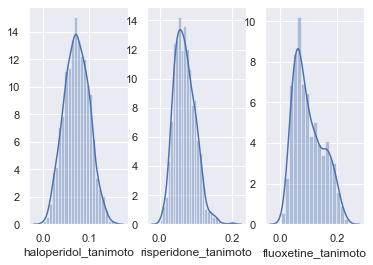

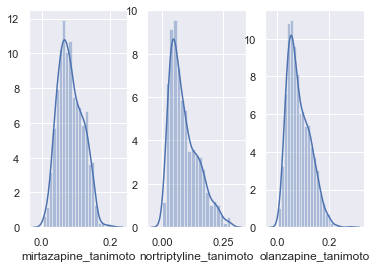

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.set(color_codes=True)
sns.distplot(df_combine.haloperidol_tanimoto, ax=ax1)
sns.distplot(df_combine.risperidone_tanimoto, ax=ax2)
sns.distplot(df_combine.fluoxetine_tanimoto, ax=ax3)

fig, (ax4, ax5, ax6) = plt.subplots(1, 3)
sns.distplot(df_combine.mirtazapine_tanimoto, ax=ax4)
sns.distplot(df_combine.nortriptyline_tanimoto, ax=ax5)
sns.distplot(df_combine.olanzapine_tanimoto, ax=ax6)

In [23]:
mergeData= oframe[['stitch_id','drug']].rename(columns={"drug": "name","stitch_id":"drug2"}).drop_duplicates()

In [24]:
Tanimoto_score_all=df_combine_all.merge(mergeData, on=['drug2'],how='inner').drop(columns=['drug2']).drop_duplicates()

In [ ]:
#Tanimoto_score_all.to_csv('Tanimoto_ALL_06082020.csv', index=False) 